In [1]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Positive_tensors.zip 

--2024-05-10 12:39:31--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Positive_tensors.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196, 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2598656062 (2.4G) [application/zip]
Saving to: ‘Positive_tensors.zip.2’

Positive_tensors.zi 100%[===================>]   2.42G  33.4MB/s    in 77s     

2024-05-10 12:40:54 (32.2 MB/s) - ‘Positive_tensors.zip.2’ saved [2598656062/2598656062]



In [3]:
!unzip -q Positive_tensors.zip


In [5]:
! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Negative_tensors.zip
!unzip -q Negative_tensors.zip

--2024-05-10 13:20:39--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Negative_tensors.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196, 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2111408108 (2.0G) [application/zip]
Saving to: ‘Negative_tensors.zip.1’

Negative_tensors.zi 100%[===================>]   1.97G  30.9MB/s    in 58s     

2024-05-10 13:21:43 (34.5 MB/s) - ‘Negative_tensors.zip.1’ saved [2111408108/2111408108]



In [ ]:
!unzip -q Negative_tensors.zip

In [5]:
!pip install torchvision

In [6]:
import os

output_dir = "./" + "/Positive_tensors"
if os.path.exists(output_dir):
    print("Number of files in directory '{}' : {}".format(output_dir, len([name for name in os.listdir(output_dir)])))

output_dir = "./" + "/Negative_tensors"
if os.path.exists(output_dir):
    print("Number of files in directory '{}' : {}".format(output_dir, len([name for name in os.listdir(output_dir)])))

Number of files in directory './/Positive_tensors' : 20000
Number of files in directory './/Negative_tensors' : 20000


# <b>Step 1</b>: Load the pre-trained model <code>resnet18</code> Set the parameter <code>pretrained</code> to true:


In [1]:
# These are the libraries will be used for this lab.
import torchvision.models as models
from PIL import Image
import pandas
from torchvision import transforms
import torch.nn as nn
import time
import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
import h5py
import os
import glob
torch.manual_seed(0)

In [2]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

In [3]:
# Create your own dataset object

class Dataset(Dataset):

    # Constructor
    def __init__(self, transform=None, train=True):
        directory = "./" 
        positive = "Positive_tensors"
        negative = "Negative_tensors"

        positive_file_path = os.path.join(directory, positive)
        negative_file_path = os.path.join(directory, negative)
        positive_files = [os.path.join(positive_file_path, file) for file in os.listdir(positive_file_path) if file.endswith(".pt")]
        negative_files = [os.path.join(negative_file_path, file) for file in os.listdir(negative_file_path) if file.endswith(".pt")]
        
        number_of_samples = len(positive_files)+len(negative_files)
        
        self.all_files = [None]*number_of_samples
        self.all_files[0::2] = positive_files
        self.all_files[1::2] = negative_files 
        
        # The transform is goint to be used on image
        self.transform = transform
        
        #torch.LongTensor
        self.Y = torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2] = 1
        self.Y[1::2] = 0
        
        NUM_OF_ITEMS_FOR_SPLITTING = 30000
        if train:
            self.all_files = self.all_files[0:NUM_OF_ITEMS_FOR_SPLITTING]
            self.Y = self.Y[0:NUM_OF_ITEMS_FOR_SPLITTING]
            self.len = len(self.all_files)
        else:
            self.all_files = self.all_files[NUM_OF_ITEMS_FOR_SPLITTING:]
            self.Y = self.Y[NUM_OF_ITEMS_FOR_SPLITTING:]
            self.len = len(self.all_files)     
       
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):               
        image = torch.load(self.all_files[idx])
        y = self.Y[idx]
                  
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)
        return image, y
    
print("done")

done


In [4]:
train_dataset = Dataset(train=True)
validation_dataset = Dataset(train=False)
print("done")

done


In [5]:
import torchvision.models as models


model = models.resnet18(pretrained=True)
model

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/jupyterlab/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [6]:
model.requires_grad=False

in_features = 512
out = 2



In [7]:
model.fc = torch.nn.Linear(in_features,out)

In [8]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [9]:
criterion = torch.nn.CrossEntropyLoss()

In [10]:
batch_size = 100

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=batch_size)

In [11]:
# Verify the parameters whose requires_grad are True
#for param in model.parameters():
#  if param.requires_grad:
#    print(param)

In [12]:
optimizer = torch.optim.Adam([parameters for parameters in model.parameters() if parameters.requires_grad], lr=0.01,) 

In [ ]:
n_epochs = 1
loss_list = []
accuracy_list = []
accuracy = 0
correct = 0
N_test = len(validation_dataset)
N_train = len(train_dataset)
start_time = time.time()
#n_epochs

print("Number of items in training set : ", N_train)
print("Number of items in testing set : ", N_test)

running_loss = 0
start_time = time.time()
for epoch in range(n_epochs):
    for i, (x, y) in enumerate(train_loader): 
        print('---' * 30)
        print('Iteration (train phase) {}/{}'.format(i+1, int(N_train/batch_size)))
        i_start_time = time.time()
        
        #x = x.to(device)
        #y = y.to(device)
            
        # set model to train 
        model.train() 
        
        # clear gradient 
        optimizer.zero_grad()
     
        # make a prediction 
        z = model(x)
   
        # calculate loss 
        loss = criterion(z, y) 
        # loss.requires_grad = True
    
        # calculate gradients of parameters 
        loss.backward()
        
        # update parameters 
        optimizer.step()
        
        loss_list.append(loss.data)
        print("Finished in {} (s)".format(time.time()-i_start_time))
    # end for
 
    correct=0
    for i, (x_test, y_test) in enumerate(validation_loader):
        print('-' * 30)
        print('Iteration (validation phase) {}/{}'.format(i+1, int(N_test/batch_size)))
        i_start_time = time.time()
        
        #x_test = x_test.to(device)
        #y_test = y_test.to(device)
        
        # set model to eval 
        model.eval()
       
        # make a prediction 
        z = model(x_test)
        
        # find max 
        _, yhat = torch.max(z.data, 1)
       
       
        #Calculate misclassified  samples in mini-batch 
        #hint +=(yhat==y_test).sum().item()
        correct += (yhat==y_test).sum().item()  
        
        print("Finishing in {} (s)".format(time.time()-i_start_time))
    # end for
    
    accuracy=correct/N_test
    print("Epoch %d - accuracy: %.3f" % (epoch+1, accuracy))
    
    accuracy_list.append(accuracy)
    print("-" * 72)
    
    # Save model
    #model_file_path = model_path + "resnet18_trained_model_epoch_{}.pth".format(epoch+1)
    #torch.save(model.state_dict(), model_file_path)
    
    # Duration for epoch
    print("Finished epoch {} in {} (s).".format(epoch+1, time.time()-start_time))
# end for

Number of items in training set :  30000
Number of items in testing set :  10000
------------------------------------------------------------------------------------------
Iteration (train phase) 1/300
Finished in 25.078449249267578 (s)
------------------------------------------------------------------------------------------
Iteration (train phase) 2/300
Finished in 25.73732614517212 (s)
------------------------------------------------------------------------------------------
Iteration (train phase) 3/300
Finished in 26.801669120788574 (s)
------------------------------------------------------------------------------------------
Iteration (train phase) 4/300
Finished in 25.83926010131836 (s)
------------------------------------------------------------------------------------------
Iteration (train phase) 5/300
Finished in 25.95499849319458 (s)
------------------------------------------------------------------------------------------
Iteration (train phase) 6/300
Finished in 24.639987

In [14]:
accuracy


0.979

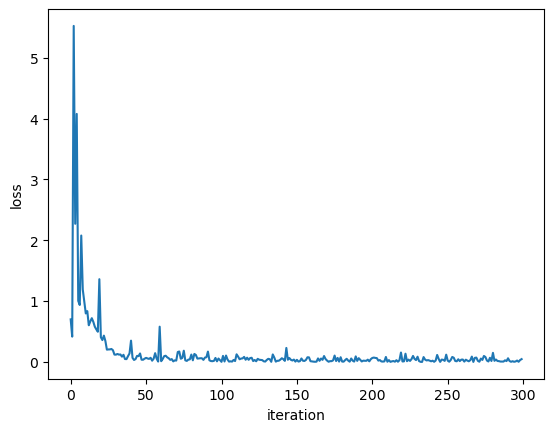

In [15]:
plt.plot(loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

In [16]:
count = 0
max_num_of_items = 4  # first four mis-classified samples
validation_loader_batch_one = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=1)

for i, (x_test, y_test) in enumerate(validation_loader_batch_one):
    # set model to eval
    model.eval()
    
    # make a prediction
    z = model(x_test)
    
    # find max
    _, yhat = torch.max(z.data, 1)
    
    # print mis-classified samples
    if yhat != y_test:
        print("Sample : {}; Expected Label: {}; Obtained Label: {}".format(str(i), str(y_test), str(yhat)))
        count += 1
        if count >= max_num_of_items:
            break
    # end if
# end for  

Sample : 22; Expected Label: tensor([1]); Obtained Label: tensor([0])
Sample : 30; Expected Label: tensor([1]); Obtained Label: tensor([0])
Sample : 144; Expected Label: tensor([1]); Obtained Label: tensor([0])
Sample : 180; Expected Label: tensor([1]); Obtained Label: tensor([0])
